(matrix_decomp)=
# Matrix Decompositions

A huge number of mathematical computing problems end up with a matrix description or a set of linear equations. From the numerical solution of ODEs and PDEs (see [MT4xxx]() and [MT5846](https://www.st-andrews.ac.uk/subjects/modules/catalogue/?code=MT5846&academic_year=2022/3)), to adjacency matrices of graphs (see [MT4514](https://www.st-andrews.ac.uk/subjects/modules/catalogue/?code=MT4514&academic_year=2022/3)), to approximation of functions (see Chapter 3) and data analysis, dealing with linear systems is a fundamental part of computational mathematics.

For this section, let us simply consider a matrix equation

$$ A\mathbf{x} = \mathbf{b} $$

where $A$ is an $N\times N$ matrix, $\mathbf{x}$ a $N$-dimensional vector of unknowns, $\mathbf{b}$ a similar vector of knowns. The problem of finding $\mathbf{x}$ is 

In [8]:
from scipy import linalg
import numpy as np

rng = np.random.default_rng()
A = rng.random((10,10))  # random matrix

A = A*np.transpose(A)    # make symmetric


lam,v,w = linalg.eig(A, left=True, right=True)

In [27]:
A_check = v@np.diag(lam)@linalg.inv(v)

In [72]:
lam

array([ 2.87182906+0.j, -1.20722298+0.j, -0.78170855+0.j, -0.52405104+0.j,
       -0.07585869+0.j,  0.08473735+0.j,  0.41425509+0.j,  1.01001019+0.j,
        0.66797706+0.j,  0.78747402+0.j])

In [26]:
import imageio.v2 as imageio
# Load the image
img = imageio.imread('images/test2.jpg')
g_img = img[:,:,0] * 299/1000 + img[:,:,1] * 587/1000 + img[:,:,2] * 114/1000
#imageio.imsave('images/gray_test.jpg', g_img)


Lossy conversion from float64 to uint8. Range [0.587, 127.084]. Convert image to uint8 prior to saving to suppress this warning.


In [116]:
import matplotlib.image as mpimg
img = mpimg.imread('images/test2.jpg')

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

g_img = rgb2gray(img)

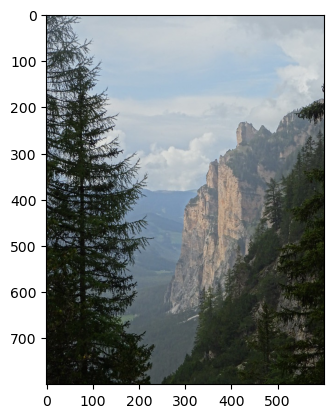

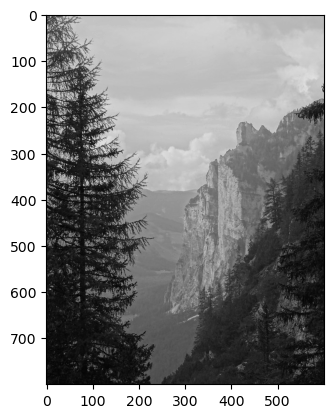

In [117]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(img[:,:,:],cmap="gray")
plt.figure()
plt.imshow(g_img,cmap="gray")

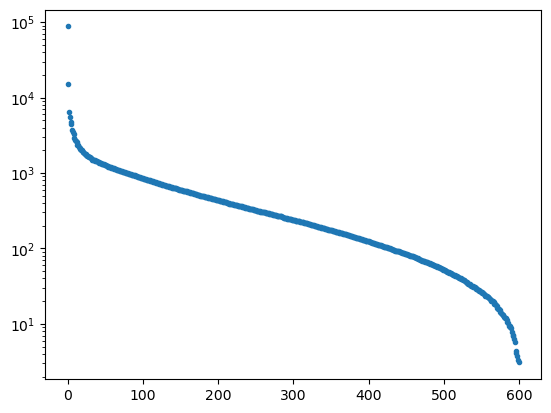

In [118]:
u, s, vh = np.linalg.svd(g_img, full_matrices=False)

plt.figure()
plt.semilogy(s,'.')
plt.show()

In [129]:
rng = np.random.default_rng()
eps = 1.00
s_noised = np.zeros_like(s)
for i,si in enumerate(s):
    #print(i,si)
    if(si<1000):
        s_noised[i] = si*eps*np.random.random()
    else:
        s_noised[i] = si

img_noised = np.array(np.dot(u_noised * s_noised, vh), dtype=int)
imageio.imsave('images/test_noisy.jpg', img_noised)


Lossy conversion from int64 to uint8. Range [-23, 265]. Convert image to uint8 prior to saving to suppress this warning.


In [154]:
f_img = np.fft.rfft2(g_img)
N,M = np.shape(f_img)

ph = 2*np.pi*np.random.rand(N,M)

f_img[2*N//4:,2*M//4:] =  f_img[2*N//4:,2*M//4:]*np.exp(1j*ph[2*N//4:,2*M//4:])

img_fft_noise = np.fft.irfft2(f_img)

Text(0.5, 1.0, 'After')

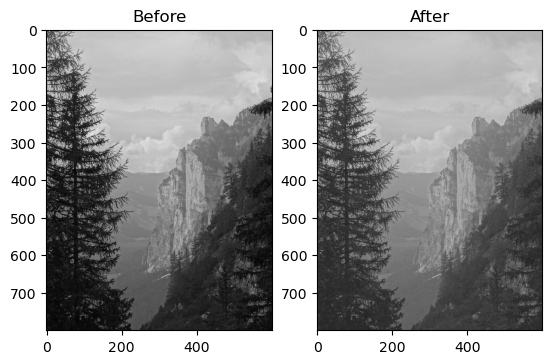

In [155]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(g_img,cmap="gray")
ax.set_title('Before')
#plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img_fft_noise,cmap="gray")
#imgplot.set_clim(0.0, 0.7)
ax.set_title('After')
#plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

In [159]:
u, s, vh = np.linalg.svd(img_fft_noise, full_matrices=False)


s_cleaned = np.zeros_like(s)
for i,si in enumerate(s):
    #print(i,si)
    if(si>500):
        s_cleaned[i] = si
img_denoised = np.array(np.dot(u * s_cleaned, vh), dtype=int)
imageio.imsave('images/test_smooth.jpg', img_denoised)


Lossy conversion from int64 to uint8. Range [-44, 291]. Convert image to uint8 prior to saving to suppress this warning.


Text(0.5, 1.0, 'After')

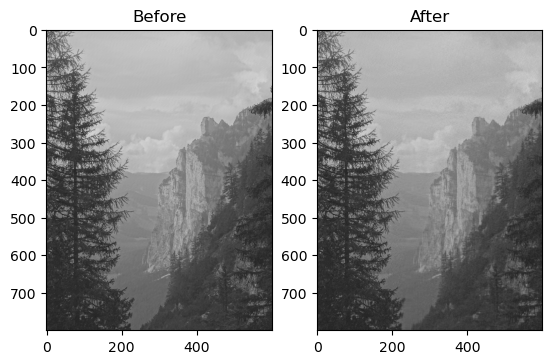

In [160]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img_fft_noise,cmap="gray")
ax.set_title('Before')
#plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img_denoised,cmap="gray")
#imgplot.set_clim(0.0, 0.7)
ax.set_title('After')
#plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')